In [1]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src') 

from utils.data_loader import load_data

# Load data
df_news = load_data('../data/cleaned_analyst_ratings.csv')
df_stock = load_data('../data/META_cleaned.csv')



Data loaded successfully from ../data/cleaned_analyst_ratings.csv
Data loaded successfully from ../data/META_cleaned.csv


In [2]:
df_news.columns

Index(['headline', 'url', 'publisher', 'date', 'stock', 'year', 'month',
       'day_of_week', 'hour', 'published_date', 'headline_tokens',
       'cleaned_headline'],
      dtype='object')

In [3]:
df_stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')

1. Date Alignment

In [2]:
# Convert dates in both datasets
df_news['date'] = pd.to_datetime(df_news['date']).dt.date
df_stock['Date'] = pd.to_datetime(df_stock['Date']).dt.date

In [6]:
# Filter news data for META |FB only
meta_news = df_news[df_news['stock'] == 'FB'].copy()

meta_news

,headline,url,publisher,date,stock,year,month,day_of_week,hour,published_date,headline_tokens,cleaned_headline
473873,As Expected: Fed Keeps Rates Unchanged and For...,https://www.benzinga.com/news/20/06/16226512/a...,JJ Kinahan,2020-06-10,FB,2020,6,Wednesday,20,2020-06-10,"['As', 'Expected', ':', 'Fed', 'Keeps', 'Rates...",expected fed keep rate unchanged forecast year...
473874,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,FB,2020,6,Wednesday,19,2020-06-10,"['Facebook', ',', 'Snap', 'Analyst', 'Projects...",facebook snap analyst project q2 revenue upsid...
473875,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,FB,2020,6,Wednesday,15,2020-06-10,"['Tech', 'Stocks', 'And', 'FAANGS', 'Strong', ...",tech stock faangs strong start market awaits fed
473876,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,FB,2020,6,Wednesday,4,2020-06-10,"['Big', 'Tech', 'Reaches', 'New', 'Record', 'H...",big tech reach record height stock market
473877,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,FB,2020,6,Wednesday,4,2020-06-10,"['Twitter', ',', 'Square', 'Will', 'Mark', 'Ju...",twitter square mark juneteenth holiday honor a...
...,...,...,...,...,...,...,...,...,...,...,...,...
474248,Facebook To Pay Users $5 For Their Voice Recor...,https://www.benzinga.com/news/20/02/15381956/f...,Neer Varshney,2020-02-21,FB,2020,2,Friday,0,2020-02-21,"['Facebook', 'To', 'Pay', 'Users', '$', '5', '...",facebook pay user voice recording
474249,No More Immunity? Justice Department Wants Tec...,https://www.benzinga.com/government/20/02/1537...,Neer Varshney,2020-02-20,FB,2020,2,Thursday,0,2020-02-20,"['No', 'More', 'Immunity', '?', 'Justice', 'De...",immunity justice department want tech legal re...
474250,Peter Thiel-Backed Startup Begins Mining Bitco...,https://www.benzinga.com/markets/cryptocurrenc...,Neer Varshney,2020-02-20,FB,2020,2,Thursday,0,2020-02-20,"['Peter', 'Thiel-Backed', 'Startup', 'Begins',...",peter thielbacked startup begin mining bitcoin...
474251,Bloomberg Pays People To Promote His Campaign ...,https://www.benzinga.com/news/20/02/15371694/b...,Neer Varshney,2020-02-19,FB,2020,2,Wednesday,0,2020-02-19,"['Bloomberg', 'Pays', 'People', 'To', 'Promote...",bloomberg pay people promote campaign personal...


In [7]:
#merege dates in both datasets
merged_df = pd.merge(meta_news, df_stock, left_on='date', right_on='Date', how='inner')

In [10]:
merged_df

,headline,url,publisher,date,stock,year,month,day_of_week,hour,published_date,...,cleaned_headline,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,As Expected: Fed Keeps Rates Unchanged and For...,https://www.benzinga.com/news/20/06/16226512/a...,JJ Kinahan,2020-06-10,FB,2020,6,Wednesday,20,2020-06-10,...,expected fed keep rate unchanged forecast year...,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.244537,20720700,0.0,0.0
1,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,FB,2020,6,Wednesday,19,2020-06-10,...,facebook snap analyst project q2 revenue upsid...,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.244537,20720700,0.0,0.0
2,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,FB,2020,6,Wednesday,15,2020-06-10,...,tech stock faangs strong start market awaits fed,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.244537,20720700,0.0,0.0
3,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,FB,2020,6,Wednesday,4,2020-06-10,...,big tech reach record height stock market,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.244537,20720700,0.0,0.0
4,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,FB,2020,6,Wednesday,4,2020-06-10,...,twitter square mark juneteenth holiday honor a...,2020-06-10,240.960007,241.210007,235.279999,236.729996,236.244537,20720700,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,Facebook To Pay Users $5 For Their Voice Recor...,https://www.benzinga.com/news/20/02/15381956/f...,Neer Varshney,2020-02-21,FB,2020,2,Friday,0,2020-02-21,...,facebook pay user voice recording,2020-02-21,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0
366,No More Immunity? Justice Department Wants Tec...,https://www.benzinga.com/government/20/02/1537...,Neer Varshney,2020-02-20,FB,2020,2,Thursday,0,2020-02-20,...,immunity justice department want tech legal re...,2020-02-20,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0
367,Peter Thiel-Backed Startup Begins Mining Bitco...,https://www.benzinga.com/markets/cryptocurrenc...,Neer Varshney,2020-02-20,FB,2020,2,Thursday,0,2020-02-20,...,peter thielbacked startup begin mining bitcoin...,2020-02-20,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0
368,Bloomberg Pays People To Promote His Campaign ...,https://www.benzinga.com/news/20/02/15371694/b...,Neer Varshney,2020-02-19,FB,2020,2,Wednesday,0,2020-02-19,...,bloomberg pay people promote campaign personal...,2020-02-19,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0


2. Sentiment Analysis

2.1 Sentiment Analysis only using TextBlob

In [49]:
# Define sentiment analysis function
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity  # Range: -1 (negative) to +1 (positive)


# Apply sentiment analysis
meta_news['sentiment'] = meta_news['cleaned_headline'].apply(get_sentiment)

# Aggregate daily sentiment (mean)
daily_sentiment = meta_news.groupby('date')['sentiment'].mean().reset_index()

#Rename for Merge Compatibility
daily_sentiment = daily_sentiment.rename(columns={'date': 'Date'})



In [50]:
# Find the most frequent publisher per day
top_publishers = meta_news.groupby('date')['publisher'].agg(lambda x: x.mode().iloc[0]).reset_index()
top_publishers = top_publishers.rename(columns={'date': 'Date'})
top_publishers

,Date,publisher
0,2020-02-19,IAM Newswire
1,2020-02-20,Neer Varshney
2,2020-02-21,Benzinga Newsdesk
3,2020-02-23,Charles Gross
4,2020-02-24,Benzinga Newsdesk
...,...,...
78,2020-06-01,Benzinga Newsdesk
79,2020-06-02,Elizabeth Balboa
80,2020-06-08,Neer Varshney
81,2020-06-09,Benzinga Insights


In [51]:
# Merge daily sentiment + top publisher
daily_sentiment_with_publisher = pd.merge(daily_sentiment, top_publishers, on='Date', how='inner')

# Merge with stock data
final_df = pd.merge(daily_sentiment_with_publisher, df_stock, on='Date', how='inner')
final_df

,Date,sentiment,publisher,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2020-02-19,0.008333,IAM Newswire,217.990005,218.320007,216.110001,217.490005,217.043991,12135100,0.0,0.0
1,2020-02-20,0.100000,Neer Varshney,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0
2,2020-02-21,-0.112500,Benzinga Newsdesk,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0
3,2020-02-24,0.043750,Benzinga Newsdesk,201.800003,203.649994,198.169998,200.720001,200.308380,23080100,0.0,0.0
4,2020-02-25,0.000000,JJ Kinahan,202.250000,203.500000,195.949997,196.770004,196.366486,21433500,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
69,2020-06-01,-0.033333,Benzinga Newsdesk,224.589996,232.440002,223.500000,231.910004,231.434418,18223800,0.0,0.0
70,2020-06-02,0.000000,Elizabeth Balboa,230.940002,233.000000,226.559998,232.720001,232.242752,20919000,0.0,0.0
71,2020-06-08,0.000000,Neer Varshney,229.029999,231.550003,227.410004,231.399994,230.925461,15466500,0.0,0.0
72,2020-06-09,-0.043750,Benzinga Insights,231.520004,239.770004,230.410004,238.669998,238.180557,27462900,0.0,0.0


In [52]:
final_df['daily_return'] = final_df['Close'].pct_change() * 100

In [53]:
final_df = final_df.dropna(subset=['daily_return'])
final_df

,Date,sentiment,publisher,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
1,2020-02-20,0.100000,Neer Varshney,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0,-1.337994
2,2020-02-21,-0.112500,Benzinga Newsdesk,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0,-2.050522
3,2020-02-24,0.043750,Benzinga Newsdesk,201.800003,203.649994,198.169998,200.720001,200.308380,23080100,0.0,0.0,-4.500900
4,2020-02-25,0.000000,JJ Kinahan,202.250000,203.500000,195.949997,196.770004,196.366486,21433500,0.0,0.0,-1.967914
5,2020-02-26,0.125000,JJ Kinahan,197.190002,201.210007,195.490005,197.199997,196.795593,16524500,0.0,0.0,0.218526
...,...,...,...,...,...,...,...,...,...,...,...,...
69,2020-06-01,-0.033333,Benzinga Newsdesk,224.589996,232.440002,223.500000,231.910004,231.434418,18223800,0.0,0.0,3.029902
70,2020-06-02,0.000000,Elizabeth Balboa,230.940002,233.000000,226.559998,232.720001,232.242752,20919000,0.0,0.0,0.349272
71,2020-06-08,0.000000,Neer Varshney,229.029999,231.550003,227.410004,231.399994,230.925461,15466500,0.0,0.0,-0.567208
72,2020-06-09,-0.043750,Benzinga Insights,231.520004,239.770004,230.410004,238.669998,238.180557,27462900,0.0,0.0,3.141748


2.2 Sentiment Analysis uing TextBlob and VADER for better financial analysis

In [ ]:
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER (better for financial text)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def enhanced_sentiment(text):
    # TextBlob sentiment
    tb_sentiment = TextBlob(str(text)).sentiment.polarity
    
    # VADER sentiment
    vader_scores = sia.polarity_scores(str(text))
    
    # Weighted average (adjust weights as needed)
    combined = (0.4 * tb_sentiment) + (0.6 * vader_scores['compound'])
    return combined



In [77]:
# Sentiment with combined method
meta_news['sentiment_combined'] = meta_news['cleaned_headline'].apply(enhanced_sentiment)
daily_sentiment_combined = meta_news.groupby('date')['sentiment_combined'].mean().reset_index().rename(columns={'date': 'Date'})
daily_sentiment_combined_with_publisher = pd.merge(daily_sentiment_combined, top_publishers, on='Date', how='inner')
merged_combined = pd.merge(daily_sentiment_combined_with_publisher, df_stock, on='Date', how='inner')

merged_combined['daily_return'] = merged_combined['Close'].pct_change() * 100

# Calculate 1-day lagged returns (news today affects tomorrow's price)
merged_combined['next_day_return'] = merged_combined['daily_return'].shift(-1)

merged_combined=merged_combined.dropna(subset=['daily_return','next_day_return'])
merged_combined

,Date,sentiment_combined,publisher,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return,next_day_return
1,2020-02-20,0.291760,Neer Varshney,216.520004,218.770004,212.949997,214.580002,214.139954,13109200,0.0,0.0,-1.337994,-2.050522
2,2020-02-21,-0.032400,Benzinga Newsdesk,213.479996,214.240005,208.830002,210.179993,209.748962,14092300,0.0,0.0,-2.050522,-4.500900
3,2020-02-24,-0.002405,Benzinga Newsdesk,201.800003,203.649994,198.169998,200.720001,200.308380,23080100,0.0,0.0,-4.500900,-1.967914
4,2020-02-25,0.119880,JJ Kinahan,202.250000,203.500000,195.949997,196.770004,196.366486,21433500,0.0,0.0,-1.967914,0.218526
5,2020-02-26,0.050000,JJ Kinahan,197.190002,201.210007,195.490005,197.199997,196.795593,16524500,0.0,0.0,0.218526,-3.777889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2020-05-29,0.027564,Benzinga Newsdesk,225.199997,227.490005,222.880005,225.089996,224.628403,23241500,0.0,0.0,-0.164114,3.029902
69,2020-06-01,-0.120421,Benzinga Newsdesk,224.589996,232.440002,223.500000,231.910004,231.434418,18223800,0.0,0.0,3.029902,0.349272
70,2020-06-02,-0.132216,Elizabeth Balboa,230.940002,233.000000,226.559998,232.720001,232.242752,20919000,0.0,0.0,0.349272,-0.567208
71,2020-06-08,0.150000,Neer Varshney,229.029999,231.550003,227.410004,231.399994,230.925461,15466500,0.0,0.0,-0.567208,3.141748


I'll compare both sentiment methods correlation and proceed with the one which has stronger correlation

In [69]:
# Textblob only correlation
from scipy.stats import pearsonr

correlation, p_value = pearsonr(final_df['sentiment'], 
                               final_df['daily_return'])

print(f"Correlation with TextBlob only: {correlation:.3f}")
print(f"P-value: {p_value:.4f}")

Correlation with TextBlob only: 0.251
P-value: 0.0322


In [70]:
#Combined method correlation
corr_combined = merged_combined['sentiment_combined'].corr(merged_combined['daily_return'])
print(f"Correlation with Combined Method: {corr_combined:.3f}")


Correlation with Combined Method: 0.492


We can see that the combined method has stronger correlation. I'll proceed with that for the next correlation analysis step.

3. Correlation Analysis

3.1 Basic Correlation

3.1.1 Correlation analysis using Pearsonr

In [ ]:

from scipy.stats import pearsonr

# Same-day correlation
same_day_corr, same_day_p = pearsonr(merged_combined['sentiment_combined'], 
                                   merged_combined['daily_return'])

# Next-day correlation
next_day_corr, next_day_p = pearsonr(merged_combined['sentiment_combined'], 
                                    merged_combined['next_day_return'])

print(f"Same Day Correlation: {same_day_corr:.3f} (p-value: {same_day_p:.4f})")
print(f"Next Day Correlation: {next_day_corr:.3f} (p-value: {next_day_p:.4f})")




Same Day Correlation: 0.499 (p-value: 0.0000)
Next Day Correlation: -0.271 (p-value: 0.0214)


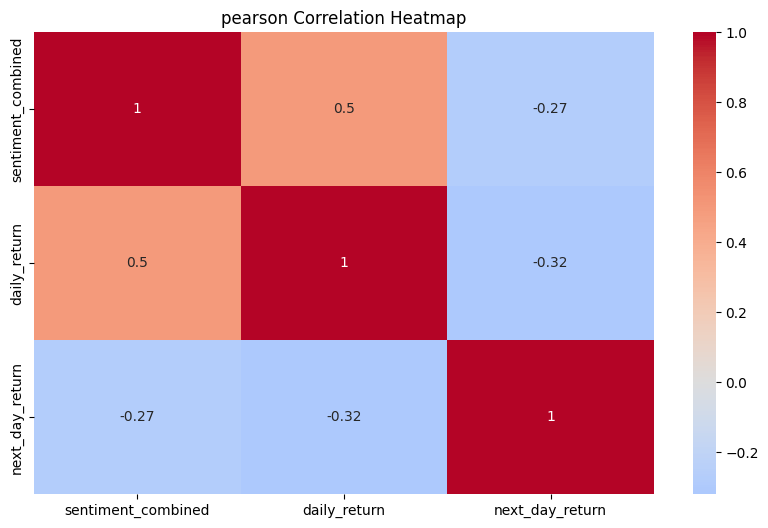

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant numeric columns
corr_data = merged_combined[['sentiment_combined', 'daily_return', 'next_day_return']]

# Compute correlation matrix (Pearson)
corr_matrix = corr_data.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("pearson Correlation Heatmap")
plt.show()


3.1.2 Correlation analysis using Spearman

In [98]:
from scipy.stats import spearmanr

# Same-day Spearman correlation
same_day_corr_spearman, same_day_p_spearman = spearmanr(
    merged_combined['sentiment_combined'], 
    merged_combined['daily_return']
)

# Next-day Spearman correlation
next_day_corr_spearman, next_day_p_spearman = spearmanr(
    merged_combined['sentiment_combined'], 
    merged_combined['next_day_return']
)

print(f"Same Day Spearman Correlation: {same_day_corr_spearman:.3f} (p-value: {same_day_p_spearman:.4f})")
print(f"Next Day Spearman Correlation: {next_day_corr_spearman:.3f} (p-value: {next_day_p_spearman:.4f})")


Same Day Spearman Correlation: 0.450 (p-value: 0.0001)
Next Day Spearman Correlation: -0.199 (p-value: 0.0945)


3.1.3 Correlation Visual Presentation

3.1.3.1 Pairplot (Scatter matrix with histograms)
For visual relationships between each pair of variables:

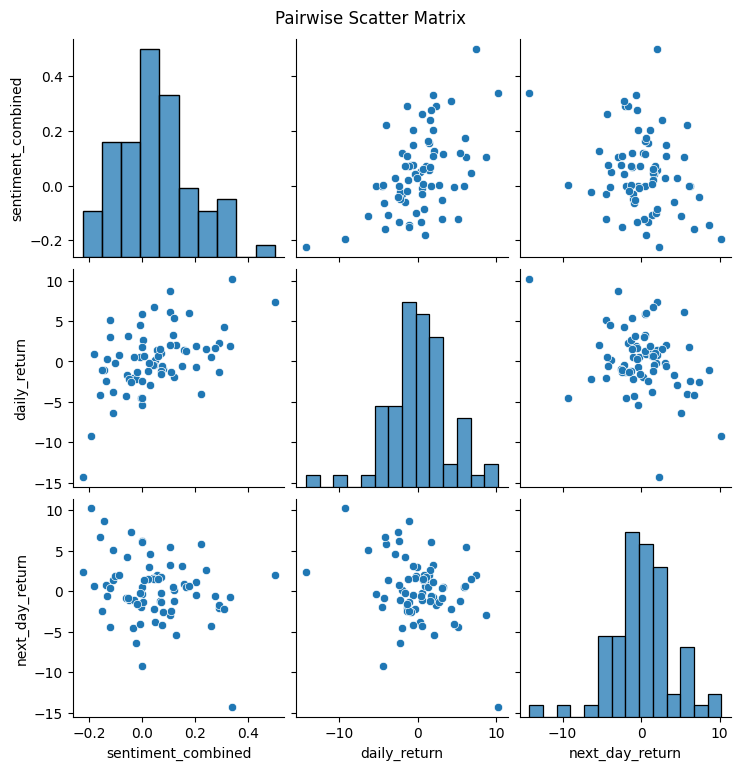

In [99]:
sns.pairplot(corr_data)
plt.suptitle("Pairwise Scatter Matrix", y=1.02)
plt.show()


3.1.3.2 Scatter Plot
To inspect individual relationships, like sentiment_combined vs daily_return:

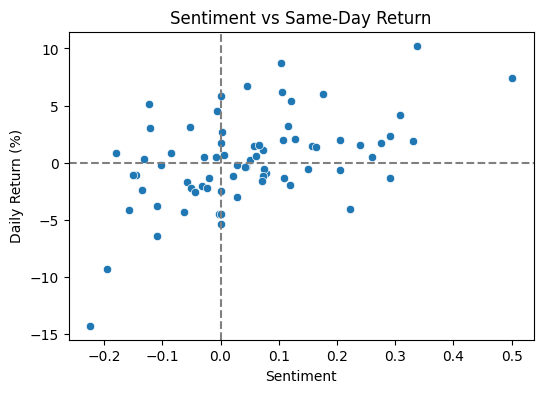

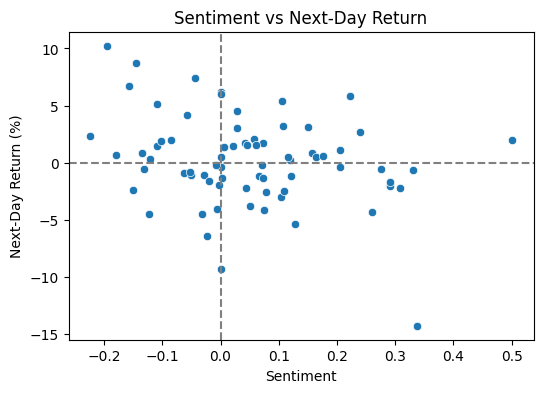

In [100]:
# Same-day
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sentiment_combined', y='daily_return', data=merged_combined)
plt.title("Sentiment vs Same-Day Return")
plt.xlabel("Sentiment")
plt.ylabel("Daily Return (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

# Next-day
plt.figure(figsize=(6, 4))
sns.scatterplot(x='sentiment_combined', y='next_day_return', data=merged_combined)
plt.title("Sentiment vs Next-Day Return")
plt.xlabel("Sentiment")
plt.ylabel("Next-Day Return (%)")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()


3.2 Time-Aware Analysis

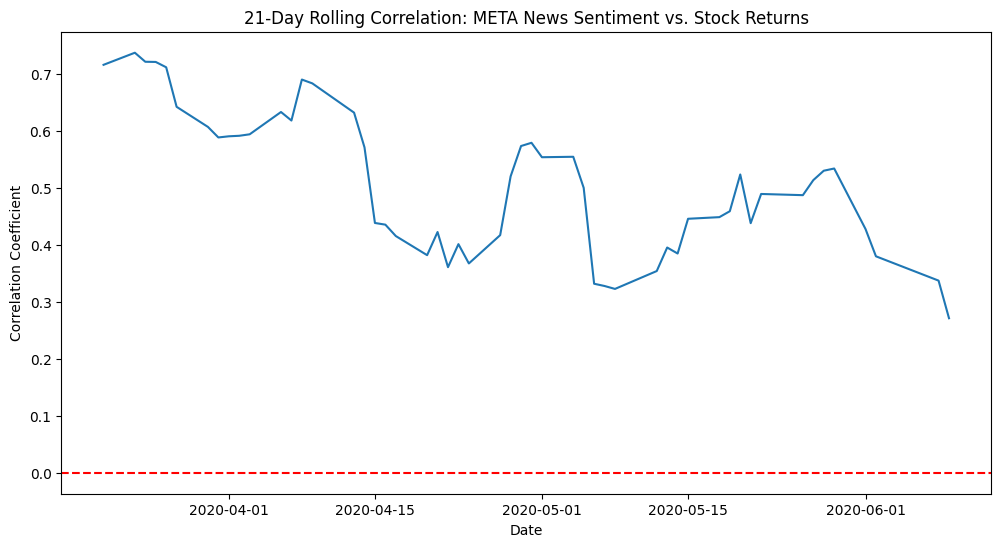

In [80]:
# Weekly rolling correlation
merged_combined.set_index('Date', inplace=True)
merged_combined['rolling_corr'] = merged_combined['sentiment_combined'].rolling(window=21).corr(merged_combined['daily_return'])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
merged_combined['rolling_corr'].plot(title='21-Day Rolling Correlation: META News Sentiment vs. Stock Returns')
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel('Correlation Coefficient')
plt.show()

Categorical Analysis

In [81]:
# Categorize sentiment
merged_combined['sentiment_category'] = pd.cut(merged_combined['sentiment_combined'],
                                         bins=[-1, -0.3, 0.3, 1],
                                         labels=['Negative', 'Neutral', 'Positive'])

# Group returns by sentiment category
category_stats = merged_combined.groupby('sentiment_category',observed=True)['daily_return'].agg(['mean', 'std', 'count'])
print("\nReturn Statistics by Sentiment Category:")
print(category_stats)


Return Statistics by Sentiment Category:
                        mean       std  count
sentiment_category                           
Neutral            -0.131577  3.681258     68
Positive            5.935418  3.632622      4


Publisher-Specific Analysis:

In [84]:
# Compare sentiment impact by publisher
publisher_impact = merged_combined.groupby(['Date', 'publisher'])['sentiment_combined'].mean().unstack()
publisher_corrs = publisher_impact.apply(lambda col: col.corr(merged_combined['daily_return']))

publisher_corrs=publisher_corrs.dropna()
publisher_corrs

d:\projects\TenAcademy\week1\KAIM-WEEK-1\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\projects\TenAcademy\week1\KAIM-WEEK-1\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\projects\TenAcademy\week1\KAIM-WEEK-1\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


publisher
Benzinga Insights    0.549600
Benzinga Newsdesk    0.609092
ETF Professor       -0.520379
Elizabeth Balboa     1.000000
JJ Kinahan          -0.991979
Lisa Levin           1.000000
Neer Varshney        0.172093
Vick Meyer          -1.000000
dtype: float64

Volume-Adjusted Returns:

In [90]:
# Weight returns by trading volume
merged_combined['volume_weighted_return'] = merged_combined['daily_return'] * (merged_combined['Volume'] / merged_combined['Volume'].mean())
merged_combined['volume_weighted_return']

0    -0.668592
1    -1.101481
2    -3.959752
3    -1.607793
4     0.137645
        ...   
67   -0.145392
68    2.104740
69    0.278507
70   -0.334400
71    3.288885
Name: volume_weighted_return, Length: 72, dtype: float64